# Описание проекта


Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


# Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


Задача


- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

# Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.


Задача


Проанализируйте A/B-тест:


- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

 Для начала подготовим все библиотеки для работы и откроем датафреймы

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
with pd.option_context('display.max_colwidth', None):
    display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [4]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


# Часть 1. Приоритизация гипотез.
## Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
pd.options.display.max_colwidth = 210
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='ICE', ascending=False)


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Лидирует гипотиза № 8 "Запустить акцию, дающую скидку на товар в день рождения", а в самых отстаюзих № 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".	


## Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
pd.options.display.max_colwidth = 210
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Тут лидирует гипотиза № 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", а в самыйх отстаюзих по прежнему № 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"

## Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

В ICE и	RICE первые 5 индексов гипотиз совпадают, но их приоретизация разная. В ICE лидируют 8, 0, 7, 6, 2, а в RICE 7, 2, 0, 6, 8. Врзможно стоит рассмотреть эти 5 гипотиз в первую очедь. Так произошло, потому что в рассчтете RICE еше использовался параметр - охват пользователей(Reach). 

# Часть 2. Анализ A/B-теста

Сделаем небольшую предобработку данных

In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проверим на наличие дубликатов

In [9]:
visitors.duplicated().sum()

0

In [10]:
orders.duplicated().sum()

0

Изменим тип поля date с object на  datetime 

In [11]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Определим, за какой период нам доступны данные 

In [15]:
min_date = min(orders['date'])
max_date = max(orders['date'])
print('Дата начала теста', min_date,',','дата окончания теста', max_date)


Дата начала теста 2019-08-01 00:00:00 , дата окончания теста 2019-08-31 00:00:00


Посмотреть на распределение количества пользователей в каждой группе.

In [16]:
groupA = (orders[orders['group'] == 'A'])

groupB = (orders[orders['group'] == 'B'])
print('В группе А', len(groupA),'пользователей', ',', 'в группе В', len(groupB),'пользователей')

В группе А 557 пользователей , в группе В 640 пользователей


В группе В пользователей больше, чем в группе А, возможно потому, что пользователи из группы В совершали больше заказов.

Проверим, не попадают ли у нас пользователи в обе группы

In [63]:
users_group = orders.groupby('visitorId').agg({'group':['nunique']})
users_group.columns = ['groups']
users_group = len(users_group.query('groups > 1'))
users_group

58

В обе группы попадает всего 58 пользователей. Считаю, что можно не удалять их, они не особо влияют на рещультаты исследрвания. Так же, возможно, что по определенным критериям эти пользователи подходили и в группу А и в В.

# 1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Для того чтобы построить графмк, необходимо собрать кумулятивные данные.

Создаем массив уникальных пар значений дат и групп теста

In [18]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head(5)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Кумулятивные данные по дням о заказах

In [19]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique,\
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Кумулятивные данные  по дням о посетителях

In [20]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])
visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [21]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head(5)

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Теперь можно строить графики кумулятивной выручки по дням и группам A/B-тестирования.

In [22]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId']]
cumulativeRevenueA.head(5)

,date,revenue,transactionId
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [23]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId']]
cumulativeRevenueB.head(5)

,date,revenue,transactionId
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


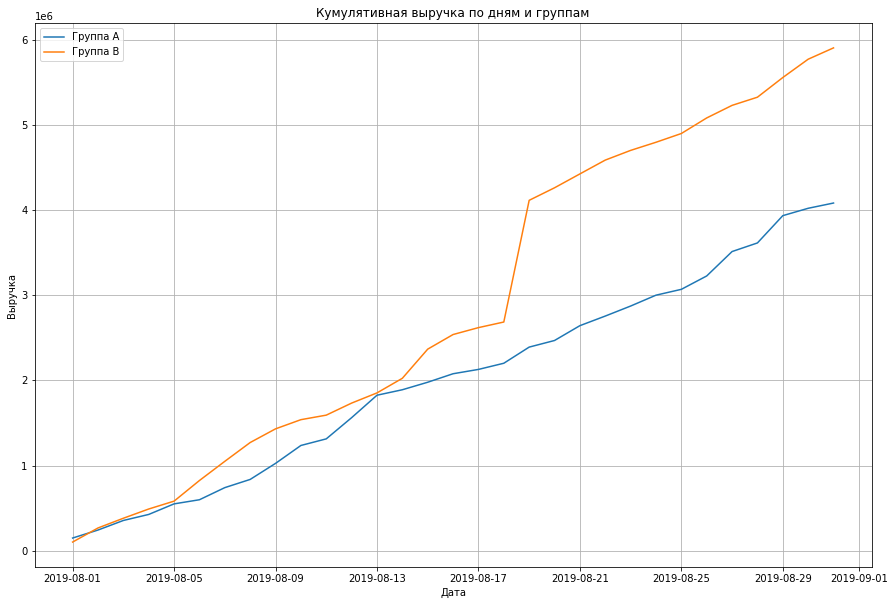

In [24]:
plt.figure(figsize=(15,10)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам')
plt.legend(['Группа А', 'Группа B'])
plt.grid()

По графику видно, что исследование проходит в течении календаного месяца, с 01-08-2019 по 01-09-2019. Лилирует группа В, но по началу обе группы увеличивали выоучку примерно одинаково, стабильно. После 18 августа произошел резкий рост выручки. Этот выброс скорей всего мог произойти или из-за заказа на большую сумму, или из-за большого количества заказов. Необходимо проверить данные вопросы.

# 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

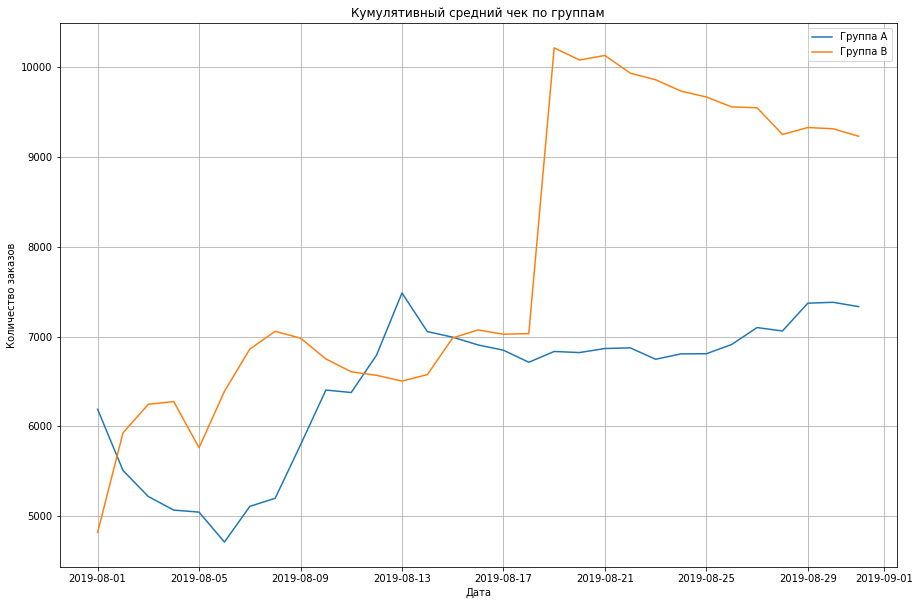

In [25]:
plt.figure(figsize=(15,10)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId'], label='B')
plt.legend(['Группа А', 'Группа B'])
plt.xlabel('Дата')
plt.ylabel('Количество заказов') 
plt.title('Кумулятивный средний чек по группам')
plt.grid()

По графику кумулятивного среднего чека видно, что так же лидирует группа В. Все же аномальный выброс после 17 августа скорей всего зависит от большого колличесива заказов. 

# 3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head(5) 

,date,revenueA,transactionIdA,revenueB,transactionIdB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Text(0, 0.5, 'Относительное изменение')

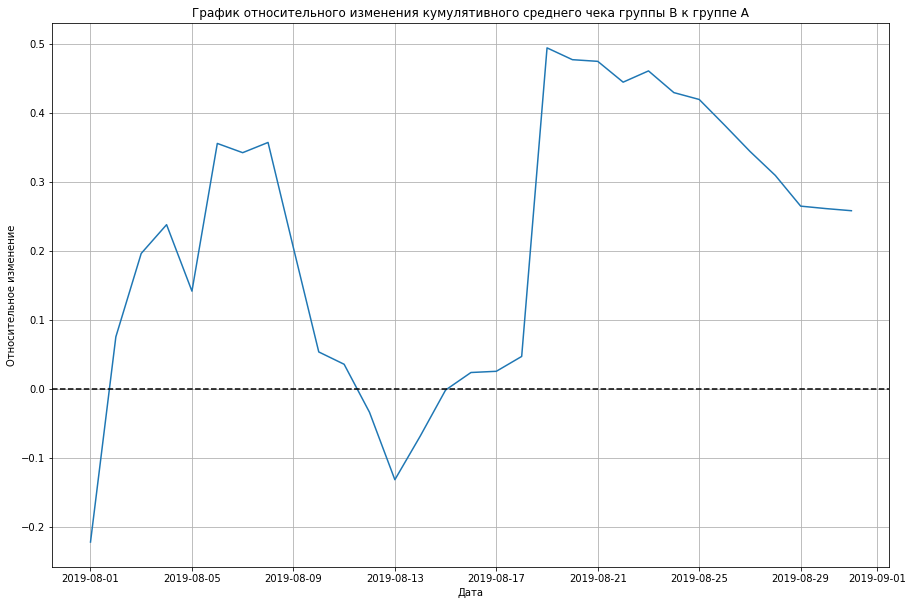

In [27]:
plt.figure(figsize=(15,10)) 
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue\
                                           ['transactionIdB'])/(mergedCumulativeRevenue['revenueA']\
                                                                /mergedCumulativeRevenue['transactionIdA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительное изменение') 

По граффику видно, что у группы В есть несколько больших выбросов по отношению к группе А. Но так же есть и резкий спаз 13-08-2019. Возмодно это связано с большики или дорогими заказами.

# 4.Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Для начала необходимо посчитать кумулятивную конверсию 

In [28]:
cumulativeData['conversion'] = cumulativeData['transactionId']/cumulativeData['visitors']
cumulativeData.head(5)

,date,group,transactionId,visitorId,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [29]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [30]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Text(0, 0.5, 'Конверсия')

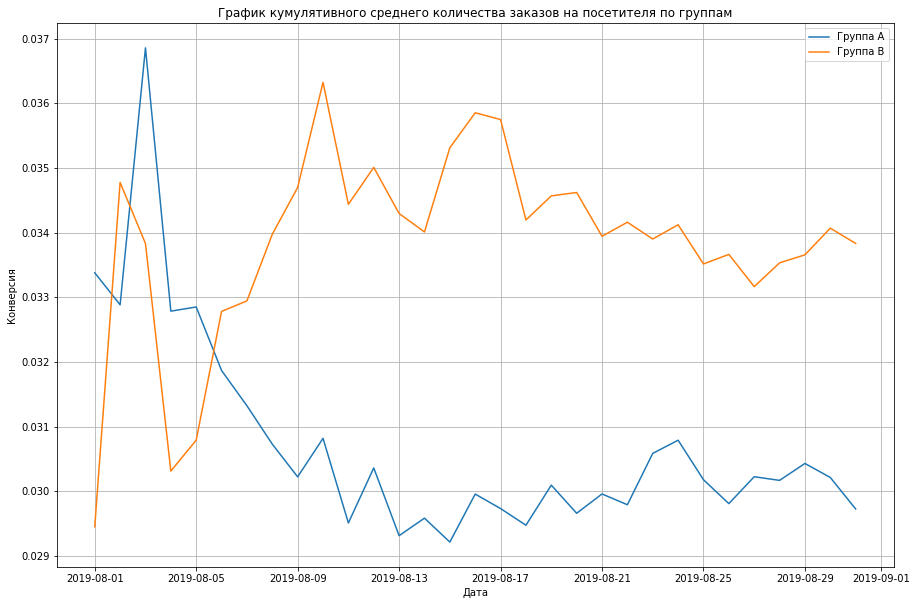

In [31]:
plt.figure(figsize=(15,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(['Группа А', 'Группа B'])
plt.xlabel('Дата')
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Конверсия')

В начале месяца конверсия у групп А и В растет, причем, у группы А коныерсия выше, чем у группы В. Но после 5 августа ситуация меняется: у А происходит резкий спад и она больше не восстанавливает свою сиду, находится в состоянии колебания от 0.029 до 0.031. У группы В обратная ситуация: конверсия до 17 августа в основном тольео растет с небольшими стпадами, а посде 17 августа происходит спад конверсии до конца месяца с небольшими колебаниями. 

# 5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head(5)


,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего количества заказов группы B к группе A')

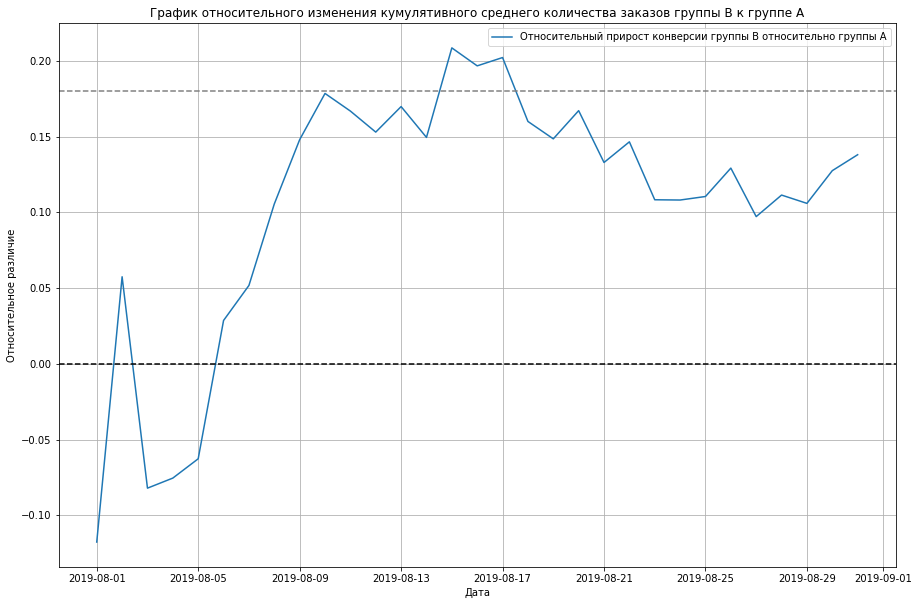

In [33]:
plt.figure(figsize=(15,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.18, color='grey', linestyle='--')
plt.grid()
plt.ylabel('Относительное различие')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')


В начале месяца был быстрый рост группы В, но затем и резкий спад. После 5 числа ситуация меняется и конверсия группы В стабильно растет. После  10 августа конверсия подвержена колебаниям - то растет, то падает, а после 17 августа колебдется и идет потихоньку на спад.В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

# 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [34]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.sort_values(by='transactionId', ascending=False).head(10)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0.5, 0, 'Количество заказов')

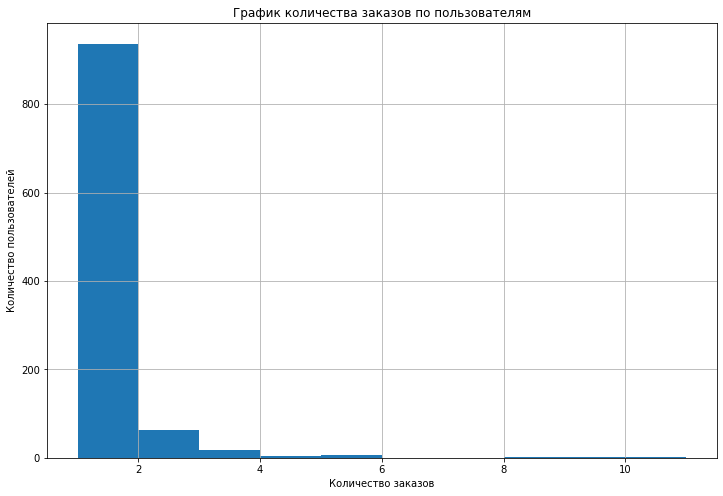

In [35]:
plt.figure(figsize=(12,8))
plt.hist(ordersByUsers['transactionId'])
plt.grid()
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')

In [36]:
x_values = pd.Series(range(0,len(ordersByUsers)))

Text(0.5, 0, 'Количество пользователей')

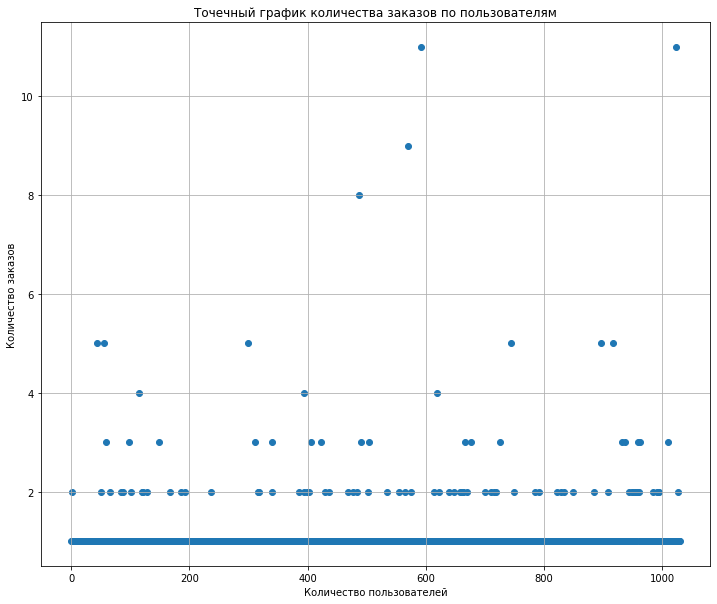

In [37]:
plt.figure(figsize=(12,10))
plt.scatter(x_values, ordersByUsers['transactionId']) 
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')

Из графиков видно, что большинство пользователей совершило всего 1 покупку, чуть меньше людей купили товары 2-3 раза. Но есть несколько выбросов, где количество покупок от 8 до 11.

# 7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [38]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

По подсчету мы видим, что 5% пользователей совершили более 2х заказа и 1% пользователей совершили более 4х заказов. Считаю, что  граница для определения аномальных пользователей будет равна 4. Большее количество заказов очень в маленьких количествах, но дают сильные выбросы.

# 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Посмотрим как распределяется стоимоить заказов

In [39]:
orders[['visitorId', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

,visitorId,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
682,4266935830,78990
662,4266935830,78990
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710


Text(0.5, 0, 'Стоимость заказов')

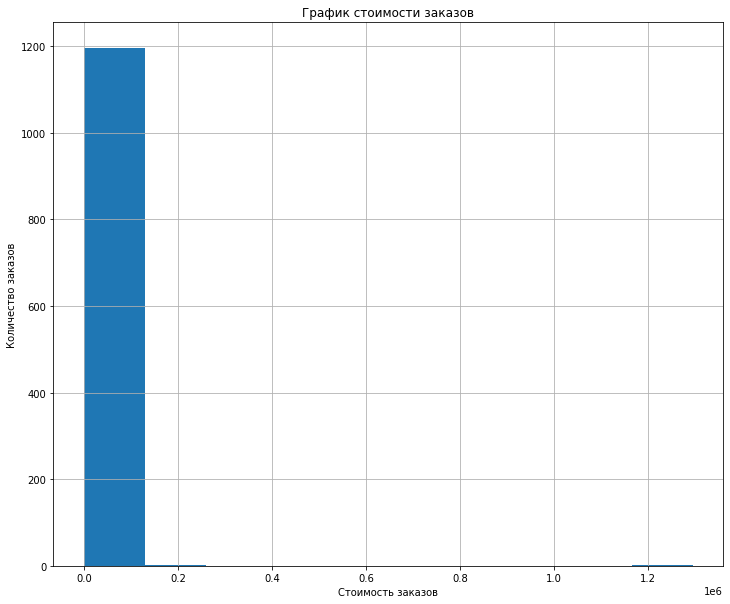

In [40]:
plt.figure(figsize=(12,10))
plt.hist(orders['revenue'])
plt.grid()
plt.title('График стоимости заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказов')

По графику видно, что большинство пользователей сделали заказы на сумму не больше 100 000, но есть анамалии, где суммы больше 200 000 и от 1 000 000 и выше. Думаю, стоит ограничить сумму покупки 100 000 и посмотреть точесное распредение.

In [41]:
x_values = pd.Series(range(0, len(orders[orders['revenue']<=100000]['revenue'])))

Text(0.5, 0, 'Количество пользователей')

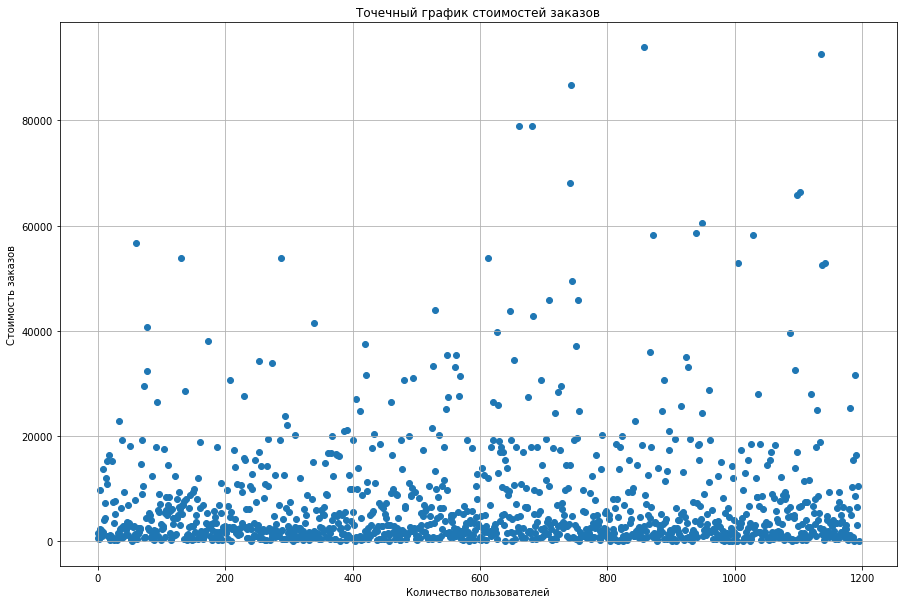

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(x_values, orders[orders['revenue']<=100000]['revenue'])
#plt.ylim(0, 100000) 
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')

Большинство пользователей совершили покупки до 20 000, необходимо посчитать процентили, чтобы оценить границу больших заказов.

# 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [43]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

5% заказов было совершено на сумму 28000, 1% заказов был совершен на сумму 58233.2. Полагаю, границей для определения аномальных заказов будет считаться сумма в 28 000, заказы на больше суммы очень редки.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Диаграммы рассеяния и выбросы по 95 и по 99 персентилю определены полностью верно.

# 10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Подготовим данные для подсчета статистической значимости. 

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head(5)

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [45]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head(5)

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [46]:
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head(5)

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [47]:
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head(5)

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [48]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [49]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)\
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head(5)

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [50]:
ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)\
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head(5)

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Будем делать проверку критерием Манна-Уитни. Для этого создадим 2 переменные, где пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [51]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [52]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                       .sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [53]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                    .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                    .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [54]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)\
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)\
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA']\
                                        .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateB']\
                                            .sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)



Мы закончили подготовку данных для теста Манна-Уитни. Теперь необходимо сформулировать нулевую и альтернативные гипотизы и проверить их.

Нулевая гипотиза: Различий в среднем количестве заказов нет

Альтернативная гипотиза: Есть различия в среднем количестве заказов

Критический уровень значимости (alpha) - 0.05.

In [55]:
alpha = 0.05
if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


In [56]:
print('p-value = ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии группы В к конверсии группы А: {0:.3f}"\
      .format(sampleB.mean() / sampleA.mean()-1))

p-value =  0.017
Относительный прирост конверсии группы В к конверсии группы А: 0.138


По итогам исследования можно сдеть вывод:

Нулевую гипотезу мы отвергаем, сделовательно будем считать, что есть различия в среднем количестве заказов межлу группами А и В. Относительный прирост конверсии составляет 13,8%.

# 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Необходимо сформулировать гипотезы:

Нулевая гипотеза: Различий в средних чеках между группами нет

Альтернативная гипотеза: Есть различия в средних чеках между группами

Коэффициент альфа: 0.05

In [57]:
print('P-value = ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                        orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue']\
                                                        .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value =  0.729
Относительные различия в среднем чеке: 0.259


In [58]:
alpha = 0.05
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1]< alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


По итогам исследования можно сдеть вывод:


Не получилось отвергнуть нулевую гипотезу, значит будем считать верным, что различия в средних чеках между группами есть. Относительные различия в среднем чеке почти 26%.


# 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Ранее в проекте мы выявили аномальные количества заказов их суммы. Итак, примем за аномальных пользователей тех, кто совершил от 4 заказов, а  аномальными заказами будут считаться сумма от 28 000.



In [59]:
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']],axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())
print(usersWithManyOrders.head(5))
print('Количество аномальных пользователей = ', abnormalUsers.shape[0])

227    2038680547
278    2458001652
499    4256040402
326    2378935119
340    2458001652
Name: userId, dtype: int64
Количество аномальных пользователей =  59


Подготовим выборки количества заказов по пользователям по группам теста:

In [60]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],\
        axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],\
       axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [61]:
print('P-value =','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы В к конверсии группы А:','{0:.3f}'\
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value = 0.018
Относительный прирост конверсии группы В к конверсии группы А: 0.145


P-value по «сырым» данным было =  0.017, а по «очищенным» = 0.018. Относительный прирост конверсии группы В к конверсии группы по «сырым» данным было =  13.8%, а по «очищенным» = 14.5%. Разницы между данными почти нет. Таким образом, подтверждаем гипотезу о том, что есть статистически значимых различий в конверсии между группами.

# 13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [62]:
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(\
                    orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительные различия в среднем чеке:', "{0:.3f}".format(orders\
                            [np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId']\
                            .isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',\
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.961
Относительные различия в среднем чеке: -0.014


P-value по «сырым» данным было =  0.729, а по «очищенным» = 0.961. Относительные различия в среднем чеке по «сырым» данным было почти 26%, а по «очищенным» данным показатели ушли в отрицательные значения = -0.14%.Таким образом, гипотезу о наличии различий в среднем чеке между группами подтвержаем. А после очистки данных средний чек группы А стал чуть больше среднего чека группы B.


# 14.Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

По имеющиеся фактам:


- Есть небольшое статистически значимое различие по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий. P-value по «сырым» данным было = 0.017, а по «очищенным» = 0.018. Относительный прирост конверсии группы В к конверсии группы по «сырым» и  «очищенным» данныи имеют разницу меньше 1%;
- А вот статистически значимое различие по среднему чеку между группами по «сырым» данным отлтчается от «очищенным». P-value по «сырым» данным было = 0.729, а по «очищенным» = 0.961. Относительные различия в среднем чеке по «сырым» данным было почти 26%, а по «очищенным» данным показатели ушли в отрицательные значения = -0.14%.

можно сделать выводы:

Тест стоит остановить, зафиксировать победу группы В над А, т.к. конверсия группы В больше чем у группы А . 

# ВЫВОДЫ.

Мною была выполнена проектная работа по курсу "Принятие решений в бизнесе". Где вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Приоритизировали гипотезы, запустите A/B-тест и проанализируйте результаты. 

1. Был проведен анализ кумулятивных метрик:
- Построила график кумулятивной выручки по группам
- Построила график кумулятивного среднего чека по группам
- Построила график относительного изменения кумулятивного среднего чека группы B к группе A. 
- Построила график кумулятивного среднего количества заказов на посетителя по группам
- Построила график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
2. Посчитала 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов
3. Посчитала статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» и «очищенным» данным
4. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным и «очищенным» данным 

В процессе выполнения проектной работы вместе подготовила список гипотез для увеличения выручки:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
2.	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3.	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4.	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5.	Запустить акцию, дающую скидку на товар в день рождения
7.	Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
8.	Запустить собственную службу доставки, что сократит срок доставки заказов
9.	Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
10.	Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

По итогам статистического анализа сделала вывод по имеющимся фактам:

Есть небольшое статистически значимое различие по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий. P-value по «сырым» данным было = 0.017, а по «очищенным» = 0.018. Относительный прирост конверсии группы В к конверсии группы по «сырым» и  «очищенным» данныи имеют разницу меньше 1%;
- А вот статистически значимое различие по среднему чеку между группами по «сырым» данным отлтчается от «очищенным». P-value по «сырым» данным было = 0.729, а по «очищенным» = 0.961. Относительные различия в среднем чеке по «сырым» данным было почти 26%, а по «очищенным» данным показатели ушли в отрицательные значения = -0.14%.

можно сделать выводы:

Тест стоит остановить, зафиксировать победу группы В над А, т.к. конверсия группы В больше чем у группы А . 